In [1]:
sentence = "\tIndonesia is the world's largest island country. And the 14th largest country by land area, at 1,904,569 square kilometers\n (735,358 square miles). \t"
sentence = sentence.lower()
print('Base:',sentence,'\n')

import re
sentence = re.sub(r'\d', '', sentence)
sentence = re.sub(r'\n', '', sentence)
print('Regex:',sentence,'\n')

import string
sentence = sentence.translate(str.maketrans('','', string.punctuation))
print('Punctuation:',sentence,'\n')

sentence = sentence.strip()
print('Whitespace:',sentence,'\n')

import nltk
words_token = nltk.word_tokenize(sentence)
sentence_token = nltk.sent_tokenize(sentence)
print('Word token:',words_token)
print('Sentence token:',sentence_token,'\n')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [x for x in words_token if x not in stop_words]
print('Stopword:',words,'\n')

from nltk.stem import PorterStemmer
nltk.download('punkt') #atau nltk.download('popular') 
ps = PorterStemmer()
word_stem = [ps.stem(x) for x in words]
print('Stemming:',word_stem,'\n')

Base: 	indonesia is the world's largest island country. and the 14th largest country by land area, at 1,904,569 square kilometers
 (735,358 square miles). 	 

Regex: 	indonesia is the world's largest island country. and the th largest country by land area, at ,, square kilometers (, square miles). 	 

Punctuation: 	indonesia is the worlds largest island country and the th largest country by land area at  square kilometers  square miles 	 

Whitespace: indonesia is the worlds largest island country and the th largest country by land area at  square kilometers  square miles 

Word token: ['indonesia', 'is', 'the', 'worlds', 'largest', 'island', 'country', 'and', 'the', 'th', 'largest', 'country', 'by', 'land', 'area', 'at', 'square', 'kilometers', 'square', 'miles']
Sentence token: ['indonesia is the worlds largest island country and the th largest country by land area at  square kilometers  square miles'] 

Stopword: ['indonesia', 'worlds', 'largest', 'island', 'country', 'th', 'largest

[nltk_data] Downloading package punkt to C:\Users\Judan Syamsul
[nltk_data]     Hadad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from nltk import pos_tag
pos_tag = nltk.pos_tag(words)

reg_exp  = "NP: {<DT>?<JJ>*<NN>}"
rp = nltk.RegexpParser(reg_exp)
result = rp.parse(pos_tag)

print('POS:',result,'\n')

POS: (S
  (NP indonesia/NN)
  worlds/NNS
  largest/JJS
  (NP island/NN)
  (NP country/NN)
  th/RB
  largest/JJS
  (NP country/NN)
  (NP land/NN)
  (NP area/NN)
  (NP square/NN)
  kilometers/NNS
  square/VBP
  miles/NNS) 



In [3]:
from nltk import ne_chunk, word_tokenize, pos_tag

sen = "Indonesia is the worlds largest island country and the 14th largest country by land area according to Google"

ne_tree = ne_chunk(pos_tag(word_tokenize(sen)))
print(ne_tree)

(S
  (GPE Indonesia/NNP)
  is/VBZ
  the/DT
  worlds/NNS
  largest/JJS
  island/NN
  country/NN
  and/CC
  the/DT
  14th/CD
  largest/JJS
  country/NN
  by/IN
  land/NN
  area/NN
  according/VBG
  to/TO
  (GPE Google/NNP))


In [4]:
corpus = [
    'Saya sedang belajar data science',
    'Data science adalah disiplin ilmu yang baru',
    'Saya menggunakan Python untuk melakukan pemrosesan data'
]

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
vectorizer = CountVectorizer()
vectorizer.fit(corpus)
vectorizer.vocabulary_

{'saya': 10,
 'sedang': 12,
 'belajar': 2,
 'data': 3,
 'science': 11,
 'adalah': 0,
 'disiplin': 4,
 'ilmu': 5,
 'yang': 14,
 'baru': 1,
 'menggunakan': 7,
 'python': 9,
 'untuk': 13,
 'melakukan': 6,
 'pemrosesan': 8}

In [7]:
vectorizer.get_feature_names_out()

array(['adalah', 'baru', 'belajar', 'data', 'disiplin', 'ilmu',
       'melakukan', 'menggunakan', 'pemrosesan', 'python', 'saya',
       'science', 'sedang', 'untuk', 'yang'], dtype=object)

In [8]:
corpus_mat = vectorizer.fit_transform(corpus)

In [9]:
corpus_mat.toarray()

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0]], dtype=int64)

In [10]:
corpus_df = pd.DataFrame(corpus_mat.toarray(), columns=vectorizer.get_feature_names_out())
corpus_df

,adalah,baru,belajar,data,disiplin,ilmu,melakukan,menggunakan,pemrosesan,python,saya,science,sedang,untuk,yang
0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0
1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0


In [11]:
stopwords = ['sedang', 'untuk', 'yang']
vecstop = CountVectorizer(stop_words=stopwords)
corpstop_mat = vecstop.fit_transform(corpus)
corpstop_df = pd.DataFrame(corpstop_mat.toarray(), columns=vecstop.get_feature_names_out())
corpstop_df

,adalah,baru,belajar,data,disiplin,ilmu,melakukan,menggunakan,pemrosesan,python,saya,science
0,0,0,1,1,0,0,0,0,0,0,1,1
1,1,1,0,1,1,1,0,0,0,0,0,1
2,0,0,0,1,0,0,1,1,1,1,1,0


In [12]:
new_sent = ['saya belajar NLP']
new_sent_mat = vecstop.transform(new_sent)
new_sent_df = pd.DataFrame(new_sent_mat.toarray(), columns=vecstop.get_feature_names_out())
new_sent_df

,adalah,baru,belajar,data,disiplin,ilmu,melakukan,menggunakan,pemrosesan,python,saya,science
0,0,0,1,0,0,0,0,0,0,0,1,0


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words=stopwords)
tfidf.fit(corpus)
corp_tfidf_mat = tfidf.transform(corpus)
corp_tfidf_df = pd.DataFrame(corp_tfidf_mat.toarray(), columns=tfidf.get_feature_names_out())
corp_tfidf_df

,adalah,baru,belajar,data,disiplin,ilmu,melakukan,menggunakan,pemrosesan,python,saya,science
0,0.000000,0.000000,0.631745,0.373119,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.480458,0.480458
1,0.450504,0.450504,0.000000,0.266075,0.450504,0.450504,0.000000,0.000000,0.000000,0.000000,0.000000,0.342620
2,0.000000,0.000000,0.000000,0.266075,0.000000,0.000000,0.450504,0.450504,0.450504,0.450504,0.342620,0.000000


# SMS Spam

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/afifai/hacktiv8-trial-class-spamdetector/main/data/dataset_sms_spam%20_v1.csv')
df.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


<AxesSubplot:>

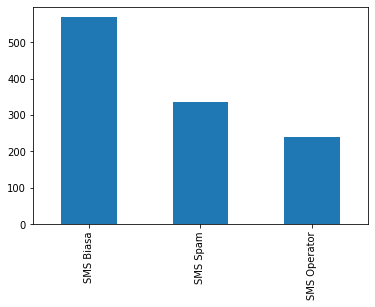

In [16]:
df.label = df.label.map({0: 'SMS Biasa',
                         1: 'SMS Spam',
                         2: 'SMS Operator'})
df.label.value_counts().plot(kind='bar')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.Teks, df.label, random_state=46)

In [18]:
X_train

357    Maaf‟ Cuma ingatkan soal kontrakan kalau mau d...
463    PT.TRI No.V11-3/16 Slamat No.SimCARD Anda mrai...
89     HOT PROMO: Internetan kuota 1,2GB/30hr HANYA R...
31     Beli 2 Gratis 1 atau beli 1 Diskon 25% tiket K...
210    Spesial untuk Anda! Paket Internet Hemat Kuota...
                             ...                        
411    Pesan resmi dari 3care Bahwa saya mendapatkan ...
658    bebas nama1, terus nanti kalau ada tgl libur, ...
403    Pelanggan Yth. TRI CARE No.XV/2015 PIN_PEMENAN...
442    Plg Yth: Simcard anda mendptkan bonus poin plu...
837           Jauh amat jemput di poskamling cilimus dee
Name: Teks, Length: 857, dtype: object

In [19]:
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

In [20]:
vect = TfidfVectorizer()
vect.fit(X_train)
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

X_train_vect, X_test_vect

(<857x4098 sparse matrix of type '<class 'numpy.float64'>'
 	with 14259 stored elements in Compressed Sparse Row format>,
 <286x4098 sparse matrix of type '<class 'numpy.float64'>'
 	with 4025 stored elements in Compressed Sparse Row format>)

In [21]:
mnb = MultinomialNB()
mnb.fit(X_train_vect,y_train)

MultinomialNB()

In [22]:
y_pred = mnb.predict(X_test_vect)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   SMS Biasa       0.95      0.95      0.95       138
SMS Operator       0.87      0.86      0.87        64
    SMS Spam       0.86      0.87      0.86        84

    accuracy                           0.91       286
   macro avg       0.89      0.89      0.89       286
weighted avg       0.91      0.91      0.91       286



In [23]:
vect = TfidfVectorizer(stop_words=stopwords)
vect.fit(X_train)
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

X_train_vect, X_test_vect

(<857x4010 sparse matrix of type '<class 'numpy.float64'>'
 	with 12378 stored elements in Compressed Sparse Row format>,
 <286x4010 sparse matrix of type '<class 'numpy.float64'>'
 	with 3397 stored elements in Compressed Sparse Row format>)

In [24]:
mnb = MultinomialNB()
mnb.fit(X_train_vect,y_train)
y_pred = mnb.predict(X_test_vect)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   SMS Biasa       0.97      0.96      0.97       138
SMS Operator       0.89      0.86      0.87        64
    SMS Spam       0.89      0.92      0.90        84

    accuracy                           0.93       286
   macro avg       0.91      0.91      0.91       286
weighted avg       0.93      0.93      0.93       286



In [25]:
vect = TfidfVectorizer(stop_words=stopwords, min_df=0.005, max_df=0.99)
vect.fit(X_train)
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

X_train_vect, X_test_vect

(<857x519 sparse matrix of type '<class 'numpy.float64'>'
 	with 7403 stored elements in Compressed Sparse Row format>,
 <286x519 sparse matrix of type '<class 'numpy.float64'>'
 	with 2372 stored elements in Compressed Sparse Row format>)

In [26]:
mnb = MultinomialNB()
mnb.fit(X_train_vect,y_train)
y_pred = mnb.predict(X_test_vect)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   SMS Biasa       0.95      0.95      0.95       138
SMS Operator       0.85      0.86      0.85        64
    SMS Spam       0.86      0.85      0.85        84

    accuracy                           0.90       286
   macro avg       0.88      0.88      0.88       286
weighted avg       0.90      0.90      0.90       286



In [27]:
pipeline = make_pipeline(vect, mnb)

In [28]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.99, min_df=0.005,
                                 stop_words=['yang', 'untuk', 'pada', 'ke',
                                             'para', 'namun', 'menurut',
                                             'antara', 'dia', 'dua', 'ia',
                                             'seperti', 'jika', 'jika',
                                             'sehingga', 'kembali', 'dan',
                                             'tidak', 'ini', 'karena', 'kepada',
                                             'oleh', 'saat', 'harus',
                                             'sementara', 'setelah', 'belum',
                                             'kami', 'sekitar', 'bagi', ...])),
                ('multinomialnb', MultinomialNB())])

In [29]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   SMS Biasa       0.95      0.95      0.95       138
SMS Operator       0.85      0.86      0.85        64
    SMS Spam       0.86      0.85      0.85        84

    accuracy                           0.90       286
   macro avg       0.88      0.88      0.88       286
weighted avg       0.90      0.90      0.90       286



In [30]:
new_sms = [
    'hai bro, apa kabar?',
    'kuota 1 GB hanya 10.000 rupiah, dapatkan di aplikasi MyGSM',
    'pesugihan halal, lipatgandakan uang anda bersama ki anu'
]

In [31]:
pipeline.predict(new_sms)

array(['SMS Biasa', 'SMS Operator', 'SMS Biasa'], dtype='<U12')

In [32]:
pipeline.predict(corpus)

array(['SMS Biasa', 'SMS Biasa', 'SMS Biasa'], dtype='<U12')